### DIfferent Weight of Connection from the MGN to the eA1 and the iA1
1 Aug 2022

In [59]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [60]:
def makesubplot (data, fig, ax, attr, varone, vartwo, brainParts, title="", unit=""):
    #varone, vartwo = "nuX_aone", "nuX_th"
    #for axis, part in zip([0, 1], ["MGN", "TRN"]):
    for axis, part in enumerate(brainParts):
        d = data[ data["brainPart"] == part ].pivot_table(attr, varone, vartwo)

        p = ax[axis].imshow(d, interpolation="nearest", norm=matplotlib.colors.LogNorm())
        
        cb = fig.colorbar(p, ax=ax[axis])
        cb.set_label(unit)

        ax[axis].set_title(title + " " + attr + " " + part)

        j = 2
        
        ax[axis].set_yticks(range(0, len(d.index.values), j))
        ax[axis].set_yticklabels(d.index.values[::j])
        
        ax[axis].set_xticks(range(0, len(d.columns.values), j))
        ax[axis].set_xticklabels(d.columns.values[::j])
        
        ax[axis].set_ylabel(varone)
        ax[axis].set_xlabel(vartwo)


In [7]:
files = pipeline.readfiles("../demyelination/data/diff-mgntoctx-conn/activity/");
df = pipeline.preparestimdf(files);

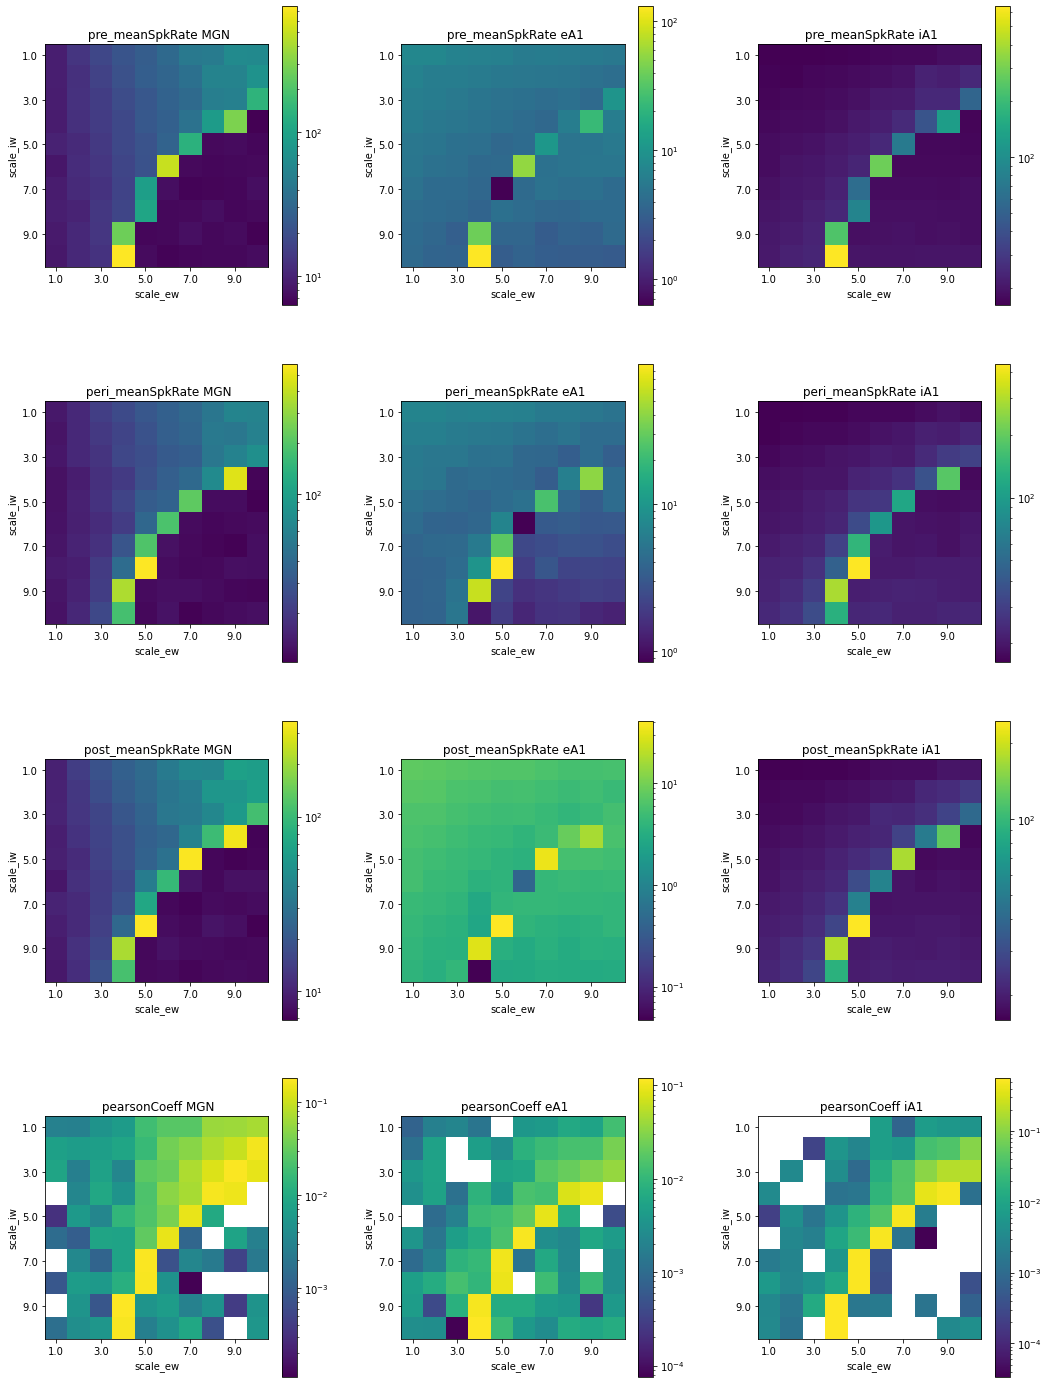

In [63]:
fig, ax = plt.subplots(nrows=4, ncols=3)

fig.set_size_inches(15, 20)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

dfFilter = (df.nuX_aone == 17) & (df.gamma_aone == 3)
#& (df.pre_meanSpkRate < 30)
# dfFilter = [True] * df.shape[0]`

varone = "scale_iw"
vartwo = "scale_ew"
parts = ["MGN", "eA1", "iA1"]

makesubplot(df[dfFilter], fig, ax[0], "pre_meanSpkRate", varone, vartwo, parts)

makesubplot(df[dfFilter], fig, ax[1], "peri_meanSpkRate", varone, vartwo, parts)

makesubplot(df[dfFilter], fig, ax[2], "post_meanSpkRate", varone, vartwo, parts)

makesubplot(df[dfFilter], fig, ax[3], "pearsonCoeff", varone, vartwo, parts)

#makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageMIT", varone, vartwo, parts)

fig.tight_layout()


In [53]:
def firingRatePlot (pth, f, mode="meanfiringrate"):
    p = pd.read_pickle(pth + f[0])
    fig, ax = plt.subplots(nrows=5, ncols=1)
    fig.set_size_inches(20, 24)

    for x in [0, 1, 2, 3]:
        ax[x].set_frame_on(False)
        ax[x].tick_params(labelbottom=False)
        ax[x].get_yaxis().set_ticks([])

    tstart = 1800
    tstop = 2300

    p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')
    p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='pink')
    p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')
    p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')
    
    colours = {'TRN' : 'lightblue', 'MGN' : 'pink', 'eA1' : 'brown', 'iA1' : 'orange'}

    for idx, brainPart in enumerate(['TRN', 'MGN', 'eA1', 'iA1']):
        if mode == 'meanfiringrate':
            ax[4].plot(p.spikeobj[brainPart].time_slice(tstart, tstop).firing_rate(10, average=True), label=brainPart, c=colours[brainPart])
            
        elif mode == 'kernelsmoothing':
            x, y = pipeline.smoothedspikes(p.spikeobj[brainPart].time_slice(tstart, tstop))
            ax[4].plot(x, y, label=brainPart, c=colours[brainPart])

    plt.xlabel("Time (ms)")
    plt.ylabel("Mean Spiking Rate")
    #plt.axhline(25, c='brown', label="y=25")

    #plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
    ax[2].spines.right.set_visible(False)
    ax[2].spines.top.set_visible(False)

    ax[4].legend()

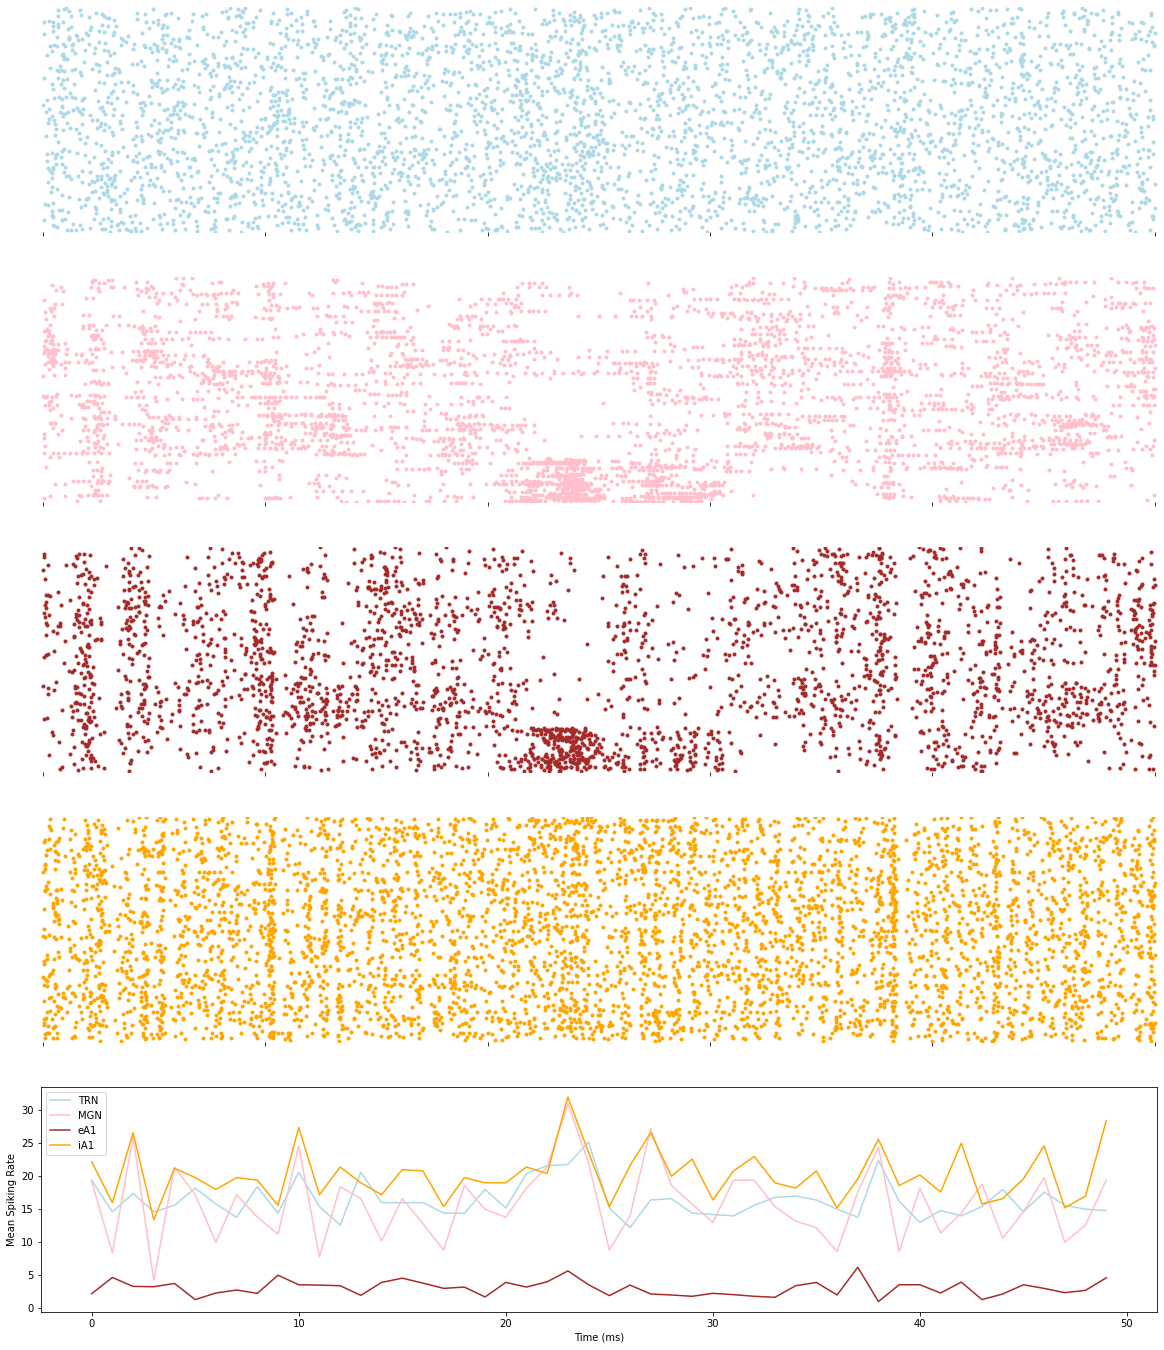

In [54]:
pth = "../demyelination/data/diff-mgntoctx-conn/activity/"
f = ['spk_diff-mgntoctx-conn_nuX_aone=15.0_gamma_aone=3.0_scale_ew=4.0_scale_iw=7.0']
firingRatePlot(pth, f)